# Cow Data Breakdown

This code is to organise and explore data from cows used in research in Spring 2021. This will help understand the sample population and identify areas in which the resulting research may be biased.

#### Import Libraries

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # this is so it doesn't truncate columns
sns.set_theme(style="ticks", palette="colorblind")
# % matplotlib inline

# Load CSV and combine into one dataframe

In [2]:
DirPath = 'cowdata/'

dfCockle = pd.read_csv(DirPath + 'CockleParkAll_20Apr2021.csv',  header=0, parse_dates=True)

dfCockle['Location'] = 'CocklePark'

print(dfCockle.head(5))

   Freeze Brand         Ear Tag              Breed     Sex Date Of Birth  \
0           NaN  UK106198300921     Aberdeen-Angus    Male    18/04/2016   
1           NaN  UK106710502626  HOLSTEIN FRIESIAN  Female    01/09/2017   
2           NaN  UK106710602634  HOLSTEIN FRIESIAN  Female    14/09/2017   
3           NaN  UK106710602641  HOLSTEIN FRIESIAN  Female    06/10/2017   
4        2645.0  UK106710302645  HOLSTEIN FRIESIAN  Female    17/10/2017   

  Date Of Acquisition Age when acquired Purchased From Date Of Disposal  \
0          30/05/2017     1 yrs  1 mths            NaN       03/02/2020   
1          01/09/2017     0 yrs  0 mths            NaN       12/02/2020   
2          14/09/2017     0 yrs  0 mths            NaN       12/02/2020   
3          06/10/2017     0 yrs  0 mths            NaN       12/02/2020   
4          17/10/2017     0 yrs  0 mths            NaN       08/06/2020   

               Disposed Of To Date Of Death Manner and Place of Destruction  \
0            

In [3]:
dfNafferton = pd.read_csv(DirPath + 'NaffertonFarmAll_20Apr2021.csv', header=0, parse_dates=True)

dfNafferton['Location'] = 'Nafferton'

print(dfNafferton.head(5))

   Freeze Brand         Ear Tag              Breed     Sex Date Of Birth  \
0           NaN  UK106386401081           Holstein  Female    01/05/2008   
1         287.0  UK107189101452  HOLSTEIN FRIESIAN  Female    04/04/2010   
2         141.0  UK107189101494  HOLSTEIN FRIESIAN  Female    09/07/2010   
3         191.0  UK107189201369  HOLSTEIN FRIESIAN  Female    17/10/2009   
4          21.0  UK107189501379  HOLSTEIN FRIESIAN  Female    10/11/2009   

  Date Of Acquisition Purchased From Date Of Disposal          Disposed Of To  \
0          27/05/2009            NaN              NaN                     NaN   
1          05/04/2011            NaN              NaN                     NaN   
2          05/04/2011            NaN       14/02/2020  SH2056 QUARRY COTTAGES   
3          12/04/2011            NaN              NaN                     NaN   
4          12/04/2011            NaN       30/07/2020            Linden Foods   

  Date Of Death   Location Group  Fqas              EID 

### Combine the files

In [45]:
# combine sheets
sheets = [dfCockle, dfNafferton]
df = pd.concat(sheets, ignore_index=True)

# Sheet Cleaning

- Drop empty columns
- Remove pointless columns
- Change format in columns for later analysis. (ex int, datetime...)

In [46]:
# Drop the empty column(s)
df.drop(df.columns[19], axis=1, inplace=True)
df.drop(df.columns[19], axis=1, inplace=True)
df.drop(columns=['Fqas', 'Name', 'Age(days)', 'Group'], inplace=True)
print(df.head(5))

   Freeze Brand         Ear Tag              Breed     Sex Date Of Birth  \
0           NaN  UK106198300921     Aberdeen-Angus    Male    18/04/2016   
1           NaN  UK106710502626  HOLSTEIN FRIESIAN  Female    01/09/2017   
2           NaN  UK106710602634  HOLSTEIN FRIESIAN  Female    14/09/2017   
3           NaN  UK106710602641  HOLSTEIN FRIESIAN  Female    06/10/2017   
4        2645.0  UK106710302645  HOLSTEIN FRIESIAN  Female    17/10/2017   

  Date Of Acquisition Age when acquired Purchased From Date Of Disposal  \
0          30/05/2017     1 yrs  1 mths            NaN       03/02/2020   
1          01/09/2017     0 yrs  0 mths            NaN       12/02/2020   
2          14/09/2017     0 yrs  0 mths            NaN       12/02/2020   
3          06/10/2017     0 yrs  0 mths            NaN       12/02/2020   
4          17/10/2017     0 yrs  0 mths            NaN       08/06/2020   

               Disposed Of To Date Of Death Manner and Place of Destruction  \
0            

In [47]:
# convert columns into the correct type
# convert birth disposal and death columns to date time format with DAY FIRST DD/MM/YYYY
df['Breed'] = df['Breed'].astype(str)
df['Sex'] = df['Sex'].astype(str)
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'], format='%d/%m/%Y')
df['Date Of Disposal'] = pd.to_datetime(df['Date Of Disposal'], format='%d/%m/%Y')
df['Disposed Of To'] = df['Disposed Of To'].astype(str)
df['Date Of Death'] = pd.to_datetime(df['Date Of Death'], format='%d/%m/%Y')
df['Location'] = df['Location'].astype(str)
df['Date Of Acquisition'] = pd.to_datetime(df['Date Of Acquisition'], format='%d/%m/%Y')
df.info() # checking
# removed , format='%d/%m/%Y'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Freeze Brand                     804 non-null    float64       
 1   Ear Tag                          1515 non-null   object        
 2   Breed                            1515 non-null   object        
 3   Sex                              1515 non-null   object        
 4   Date Of Birth                    1515 non-null   datetime64[ns]
 5   Date Of Acquisition              1515 non-null   datetime64[ns]
 6   Age when acquired                485 non-null    object        
 7   Purchased From                   554 non-null    object        
 8   Date Of Disposal                 732 non-null    datetime64[ns]
 9   Disposed Of To                   1515 non-null   object        
 10  Date Of Death                    165 non-null    datetime64[

### Check records for possible filtration errors

- we want to filter out by location
- however, we want to see that the 'sent to' location doesn't carry over into the new record
- a cow that moved locations should have two+ records AND the 'sent to' location cannot be the sheet location. Eg the Nafferton record shouldn't say the cow was sent to Nafferton

In [10]:
find = df[df['Ear Tag'].str.endswith('UK107189603641')] # look for a cow known to be in both sheets
# UK107189103328 # moved from nafferton to cockle park and back
# UK107189403681 bull calf in records
# ONe that keeps disappearing UK107189603641
find

,Freeze Brand,Ear Tag,Breed,Sex,Date Of Birth,Date Of Acquisition,Age when acquired,Purchased From,Date Of Disposal,Disposed Of To,Date Of Death,Manner and Place of Destruction,Location,EID,Age(mths)
437,NaN,UK107189603641,Shorthorn,Bull,2020-08-30,2021-02-16,0 yrs 6 mths,Newcastle University,NaT,nan,NaT,NaN,CocklePark,982000176157207,7
790,NaN,UK107189603641,Shorthorn,Bull,2020-08-30,2020-08-30,NaN,NaN,2021-02-16,31/227/0024 Cockle Park,NaT,NaN,Nafferton,982000176157207,5


# Remove Unwanted Data
- Ex drop cows that weren't there during data collection
- Problem: after sorting through end results, found that organisation was not consistent. Some dead cows don't have a date of disposal. So I need to sort out those that died BEFORE data collection
- Also need to remove cows that arrived after data collection
- One bull kept disappearing when I filtered for the dead cows even though he is not dead and has naT (nan for time series) in the disposal date and nan in the disposed to column. I have photos of mystery bull so he is alive and used in the research. He is named Mysetery Bull and will be used to see if the code works.

In [48]:
### Check for problem data
def MysteryBull(dataframe):
    MBcheck = dataframe[dataframe['Ear Tag'].str.endswith('UK107189603641')]
    if MBcheck.empty == True:
        print("Mystery bull has disappeared!")
    else:
        print(f'Mystery bull {len(MBcheck)} is in the dataset.') # should show 2 on outset because he was at both farms

# Dates to use
start = pd.to_datetime("2021-03-18", format='%Y-%m-%d')
end = pd.to_datetime("2021-04-07", format='%Y-%m-%d')

### Mask variables to remove unwanted data

# keep cows that have no disposal information or who weren't disposed before collection ended
keep = (df['Date Of Disposal'] == 'naT') | (df['Date Of Disposal'].isna()) | (df['Date Of Disposal'] > end)

# Check that the arrival date is NOT after end date
notLate = (df['Date Of Acquisition'] < end) | (df['Date Of Acquisition'].isna())

# Select those that are not dead already
notDead = (df['Date Of Death'] > end) | (df['Date Of Death'].isna())


In [49]:
print(f'Length of dataframe: {len(df)}')

# Loc to keep
df = df.loc[keep]
print(f'Length of dataframe after reducing for kept cattle: {len(df)}')
MysteryBull(df)

# Loc arrived already
df = df.loc[notLate]
print(f'Length of dataframe after removing late arrivals: {len(df)}')
MysteryBull(df)

# Loc not dead
df = df.loc[notDead]
print(f'Length of dataframe after removing dead cattle: {len(df)}')
MysteryBull(df)

Length of dataframe: 1515
Length of dataframe: 835
Mystery bull 1 is in the dataset.
Length of dataframe: 783
Mystery bull 1 is in the dataset.
Length of dataframe: 627
Mystery bull 1 is in the dataset.


In [50]:
# check for other individuals
find = df[df['Ear Tag'].str.endswith('UK107189403681')] # look for a cow known to be in both sheets
# UK107189103328 # moved from nafferton to cockle park and back
# UK107189403681 bull calf in records
# keeps going missing UK107189603641
print(find)

     Freeze Brand         Ear Tag       Breed   Sex Date Of Birth  \
426           NaN  UK107189403681  LONGHORN X  Bull    2020-10-01   

    Date Of Acquisition Age when acquired        Purchased From  \
426          2021-02-16     0 yrs  4 mths  Newcastle University   

    Date Of Disposal Disposed Of To Date Of Death  \
426              NaT            nan           NaT   

    Manner and Place of Destruction    Location              EID  Age(mths)  
426                             NaN  CocklePark  982000176157247          6  


In [51]:
# Look for duplicates
duplicates = df[df.duplicated(['Ear Tag'])]
print("Duplicate Rows based on ear tag", len(duplicates), sep='\n')

Duplicate Rows based on ear tag
0


In [44]:
df.groupby(['Breed', 'Location']).count()

Freeze Brand  Ear Tag  Sex  Date Of Birth  \
Breed                 Location                                                
ABERDEEN ANGUS X      CocklePark             0        6    6              6   
                      Nafferton              0        1    1              1   
Aberdeen-Angus        CocklePark             1        1    1              1   
                      Nafferton              0        1    1              1   
BEEF SHORTHORN        Nafferton              0        1    1              1   
BRITISH BLUE          CocklePark             1        1    1              1   
BRITISH BLUE X        CocklePark             0        1    1              1   
BRITISH FRIESIAN X    CocklePark             0        1    1              1   
                      Nafferton             14       31   31             31   
DAIRY SHORTHORN X     CocklePark             0        1    1              1   
HOLSTEIN FRIESIAN     CocklePark            48       80   80             80   
                      Nafferton            250      289  289            289   
HOLSTEIN FRIESIAN X   CocklePark             4        7    7              7   
                      Nafferton             15       21   21             21   
HOLSTEIN X            CocklePark             0        1    1              1   
Holstein              CocklePark             2        4    4              4   
                      Nafferton             15       17   17             17   
JERSEY X              Nafferton              0       17   17             17   
LONGHORN X            CocklePark             0       55   55             55   
                      Nafferton              0       35   35             35   
Longhorn              CocklePark             1        4    4              4   
MONTBELIARDE X        CocklePark             1        1    1              1   
NORWEGIAN RED X       Nafferton              2        2    2              2   
SWEDISH RED n WHITE X Nafferton              1        1    1              1   
Shorthorn             CocklePark             0        2    2              2   
                      Nafferton              0        2    2              2   
Shorthorn Dairy       Nafferton              0        1    1              1   
Swedish Red X         CocklePark             2        6    6              6   
                      Nafferton             25       30   30             30   

                                  Date Of Acquisition  Age when acquired  \
Breed                 Location                                             
ABERDEEN ANGUS X      CocklePark                    6                  6   
                      Nafferton                     1                  0   
Aberdeen-Angus        CocklePark                    1                  1   
                      Nafferton                     1                  0   
BEEF SHORTHORN        Nafferton                     1                  0   
BRITISH BLUE          CocklePark                    1                  1   
BRITISH BLUE X        CocklePark                    1                  1   
BRITISH FRIESIAN X    CocklePark                    1                  1   
                      Nafferton                    31                  0   
DAIRY SHORTHORN X     CocklePark                    1                  1   
HOLSTEIN FRIESIAN     CocklePark                   80                 80   
                      Nafferton                   289                  0   
HOLSTEIN FRIESIAN X   CocklePark                    7                  7   
                      Nafferton                    21                  0   
HOLSTEIN X            CocklePark                    1                  1   
Holstein              CocklePark                    4                  4   
                      Nafferton                    17                  0   
JERSEY X              Nafferton                    17                  0   
LONGHORN X            CocklePark                   55           

In [66]:
df['Age(mths)'].mask(df['Age(mths)'] < 0, inplace=True) # replace any negative age with zero

# Save File

In [53]:
df.to_csv('CowFace_Records_saved22Apr2021.csv', sep=',', index=False)

# Plotting and analysis
- Breakdown of cattle by sex, breed, age and location
- Ear Tag is a required column and so will be used to count individuals

In [57]:
print('Count of Individuals by Breed from Nafferton and Cockle Park Farms')
df.groupby('Breed')['Ear Tag'].count()

Count of Individuals by Breed from Nafferton and Cockle Park Farms


Breed
ABERDEEN ANGUS X           7
Aberdeen-Angus             2
BEEF SHORTHORN             1
BRITISH BLUE               1
BRITISH BLUE X             1
BRITISH FRIESIAN X        32
DAIRY SHORTHORN X          1
HOLSTEIN FRIESIAN        366
HOLSTEIN FRIESIAN X       28
HOLSTEIN X                 1
Holstein                  20
JERSEY X                  25
LONGHORN X                93
Longhorn                   4
MONTBELIARDE X             1
NORWEGIAN RED X            2
SWEDISH RED n WHITE X      1
Shorthorn                  4
Shorthorn Dairy            1
Swedish Red X             36
Name: Ear Tag, dtype: int64

In [62]:
print("Mean Cattle Age by Breed and Location")
df.groupby('Location')['Age(mths)'].mean()

Mean Cattle Age by Breed and Location


Location
CocklePark    14.280702
Nafferton     36.070175
Name: Age(mths), dtype: float64

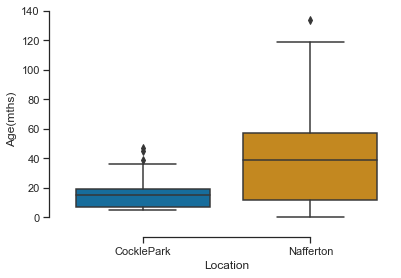

In [71]:
sns.boxplot(x="Location", y="Age(mths)", data=df)
sns.despine(offset=10, trim=True)

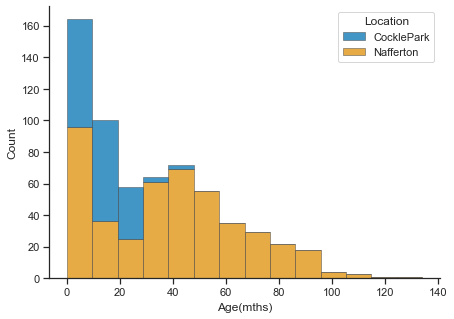

In [84]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Age(mths)", hue="Location",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_xticks([0, 4, 15, 40, 80, 140])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'HOLSTEIN FRIESIAN'),
  Text(1, 0, 'HOLSTEIN FRIESIAN X'),
  Text(2, 0, 'MONTBELIARDE X'),
  Text(3, 0, 'Longhorn'),
  Text(4, 0, 'Aberdeen-Angus'),
  Text(5, 0, 'BRITISH BLUE'),
  Text(6, 0, 'Swedish Red X'),
  Text(7, 0, 'Holstein'),
  Text(8, 0, 'HOLSTEIN X'),
  Text(9, 0, 'LONGHORN X'),
  Text(10, 0, 'BRITISH BLUE X'),
  Text(11, 0, 'BRITISH FRIESIAN X'),
  Text(12, 0, 'ABERDEEN ANGUS X'),
  Text(13, 0, 'Shorthorn'),
  Text(14, 0, 'DAIRY SHORTHORN X'),
  Text(15, 0, 'SWEDISH RED n WHITE X'),
  Text(16, 0, 'Shorthorn Dairy'),
  Text(17, 0, 'NORWEGIAN RED X'),
  Text(18, 0, 'BEEF SHORTHORN'),
  Text(19, 0, 'JERSEY X')])

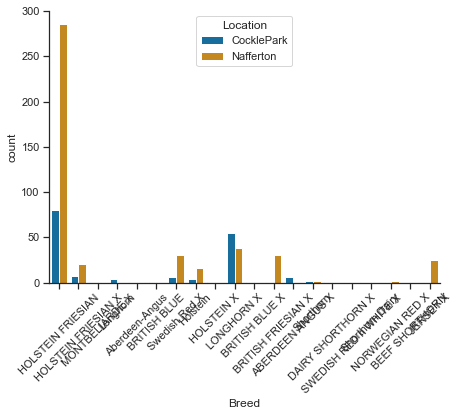

In [95]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
# Draw a nested barplot by species and sex
sns.countplot(x="Breed", hue="Location", data=df)
plt.xticks(rotation=45)

In [ ]:
# Percent of breed over total
totalCows = str(len(df))
